In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from numpy.fft import fft, ifft
import numpy as np
import scipy
import seaborn as sns


#IMPORTING FUNCTIONS FROM ./defs

from defs import defs_copy as defs_

In [2]:
# IMPORT FOR SINGLE DATABASE FILE
### SETTING PATH TO THE FILES WITH CORRECT ALIAS

path_single_1 = [
    "./database_raw/DatasetA/zzzAD1.txt"
];

df_single_1 = defs_.initDatabase(path_single_1);
df_single_1 = df_single_1.astype(float);

df_single_1

,Time,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S22,S23,S24,S25,S26,S27,S28,S29,S30,Scenario
0,0.000000,0.004954,-0.001359,0.004767,-0.008527,-0.001187,0.004383,-0.000652,-0.031577,-0.007815,...,-0.001459,0.002673,-0.001023,0.000871,-0.003662,0.005480,-0.004954,0.003155,-0.002783,1.0
1,0.000977,-0.002692,0.013224,-0.012159,0.006356,-0.010569,0.005803,-0.010348,0.051244,-0.015238,...,-0.000039,-0.002362,0.001403,0.000519,-0.003883,-0.001152,0.009068,-0.002660,-0.000935,1.0
2,0.001953,0.010440,-0.017548,-0.002409,-0.023680,0.003805,-0.014305,0.028052,-0.001950,0.022934,...,-0.001821,0.009181,-0.000987,0.004117,-0.005031,0.006924,0.008966,0.006289,-0.002047,1.0
3,0.002930,-0.019787,0.005273,-0.003471,0.004499,-0.023611,0.004459,0.012805,0.028606,0.009633,...,0.007827,0.000538,0.009287,0.000920,-0.001098,-0.002596,0.013369,-0.001364,0.003097,1.0
4,0.003906,-0.003796,0.006211,0.000715,-0.000022,-0.008824,0.017145,0.012718,0.042087,0.010510,...,-0.005141,0.011082,-0.003525,0.011010,-0.005374,0.007329,-0.007782,0.008712,-0.000247,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262139,255.995100,-0.297023,-0.151547,-0.059725,-0.052962,-0.297202,0.107587,0.199612,0.491991,0.153046,...,0.048218,-0.073839,0.133619,0.008002,-0.060962,0.048361,0.048781,-0.092742,-0.042226,1.0
262140,255.996100,-0.176614,-0.045884,-0.260080,-0.126670,0.095408,0.062842,0.494932,-0.122551,0.560416,...,-0.121218,0.056468,-0.205697,0.151583,0.283892,0.174469,-0.123170,0.003544,0.222709,1.0
262141,255.997100,0.087201,-0.129184,-0.344268,-0.285500,-0.154741,0.191804,0.207104,0.116178,-0.001026,...,-0.168463,-0.180225,0.017537,0.009359,0.048651,-0.055765,0.149840,0.242089,-0.074097,1.0
262142,255.998000,0.075681,-0.057447,0.126385,0.144944,-0.087632,0.256604,-0.060432,0.362550,0.015992,...,-0.145095,-0.200837,-0.118993,-0.097636,-0.020304,0.162171,0.254490,-0.036783,-0.073573,1.0


In [3]:
# Mean: The average value of the signal over a specific time interval.

# Standard deviation: A measure of the spread of the signal values around the mean.

# Variance: The square of the standard deviation.

# Skewness: A measure of the asymmetry of the signal values around the mean.

# Kurtosis: A measure of the "peakedness" or "flatness" of the distribution of signal values.

# **Autocorrelation: A measure of the similarity between the signal at different points in time.

# **Power spectral density: A measure of the distribution of the signal's energy over different frequencies.

In [5]:
original_df = df_single_1

# Group the values in S1 column by 50 and calculate statistical characteristics
#grouped_values = original_df['S1'].groupby(np.arange(len(original_df)) // 50).agg(['mean', 'std', 'min', 'max', 'median', 'skew'])

# Calculate the root mean square and the difference between max and min for each group
#grouped_values['rms'] = original_df['S1'].groupby(np.arange(len(original_df)) // 50).apply(lambda x: np.sqrt(np.mean(x**2)))
#grouped_values['amp_max_min'] = original_df['S1'].groupby(np.arange(len(original_df)) // 50).apply(lambda x: x.max() - x.min())
#grouped_values['kurtosis'] = original_df['S1'].groupby(np.arange(len(original_df)) // 50).apply(lambda x: pd.Series.kurtosis(x))

# Reset the index of the grouped_values dataframe
#grouped_values

df_1_S1 = defs_.getStatisticalCaracteristics(df_single_1,'S1');
df_1_S30 = defs_.getStatisticalCaracteristics(df_single_1,'S30');

time_columns = ['Média', 'Desvio Padrão', 'Valor Mínimo', 'Valor Máximo', 'Mediana', 'Skewness', 'Amplitude', 'Kurtosis'];
df_1_S1.columns = time_columns
df_1_S1



,Média,Desvio Padrão,Valor Mínimo,Valor Máximo,Mediana,Skewness,Amplitude,Kurtosis
0,-0.001358,0.143538,-0.528463,0.465484,-0.002283,0.015408,0.993947,0.103656
1,-0.000405,0.159932,-0.472932,0.457618,0.001573,-0.031585,0.930550,-0.101231
2,0.002315,0.177150,-0.571035,0.766875,0.002927,-0.003201,1.337910,0.478070
3,0.002870,0.221392,-0.620663,0.686600,0.007315,0.045592,1.307263,-0.361960
4,0.001293,0.183528,-0.711814,0.630043,0.006328,-0.133435,1.341857,0.338595
...,...,...,...,...,...,...,...,...
251,0.004145,0.171602,-0.486844,0.510267,0.008804,0.000720,0.997111,-0.144618
252,0.005604,0.158816,-0.517484,0.471792,0.011559,-0.059467,0.989275,-0.033417
253,0.003746,0.151790,-0.422182,0.433274,0.006686,-0.025000,0.855456,-0.281179
254,0.001972,0.178260,-0.603056,0.540065,-0.002544,0.095663,1.143121,0.018956


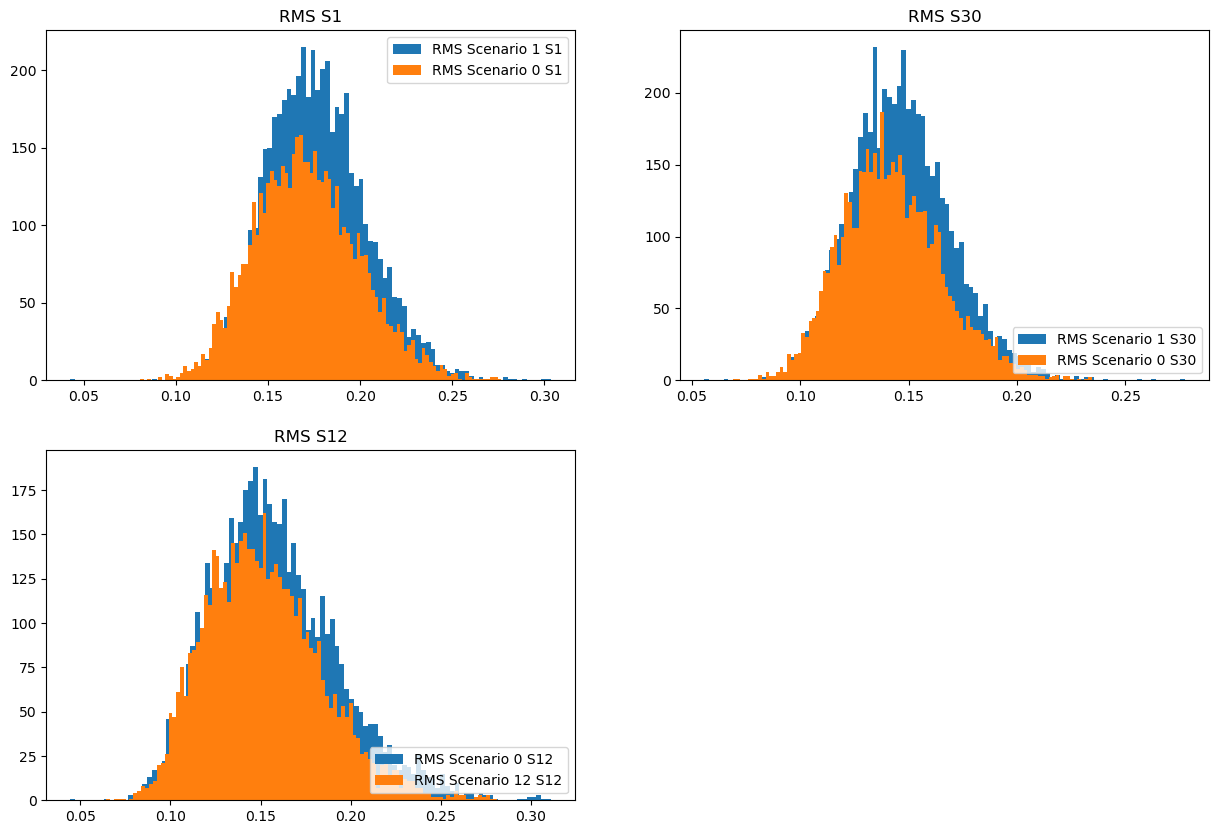

In [5]:
## Plotting caracteristics RMS

propertyvalue = 'rms'

axis = df_1_S1[propertyvalue];
axis30 = df_1_S30[propertyvalue];
axis0 = df_0_S1[propertyvalue];
axis030 = df_0_S30[propertyvalue];

axis012 = df_0_S12[propertyvalue];
axis1212 = df_12_S12[propertyvalue];
axis121 = df_12_S1[propertyvalue];

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)

plt.title("RMS S1")
plt.hist(axis, bins=100, alpha=0.5, label="RMS Scenario 1 S1")
plt.hist(axis0, bins=100, alpha=0.5, label="RMS Scenario 0 S1")

# plt.ylim([0,0.35])

plt.legend(["RMS Scenario 1 S1", "RMS Scenario 0 S1"], loc ="upper right")

plt.subplot(2,2,2)

plt.title("RMS S30")
plt.hist(axis30, bins=100, label="RMS Scenario 1 S30")
plt.hist(axis030, bins=100, label="RMS Scenario 0 S30")

# plt.ylim([0,0.35])

plt.legend(["RMS Scenario 1 S30", "RMS Scenario 0 S30"], loc ="lower right")

axis012 = df_0_S12[propertyvalue];
axis1212 = df_12_S12[propertyvalue];
axis121 = df_12_S1[propertyvalue];

plt.subplot(2,2,3)

plt.title("RMS S12")
plt.hist(axis012, bins=100, label="RMS Scenario 0 S12")
plt.hist(axis1212, bins=100, label="RMS Scenario 12 S12")

# plt.ylim([0,0.35])

plt.legend(["RMS Scenario 0 S12", "RMS Scenario 12 S12"], loc ="lower right")

In [6]:
## Maiores picos observador para o cenário de dano 1 no sensor 1 com relação ao sensor 30, 
### o que espera-se tendo em vista que o dano está aplicado ai sensor 1 e o sensor 30 esta longe

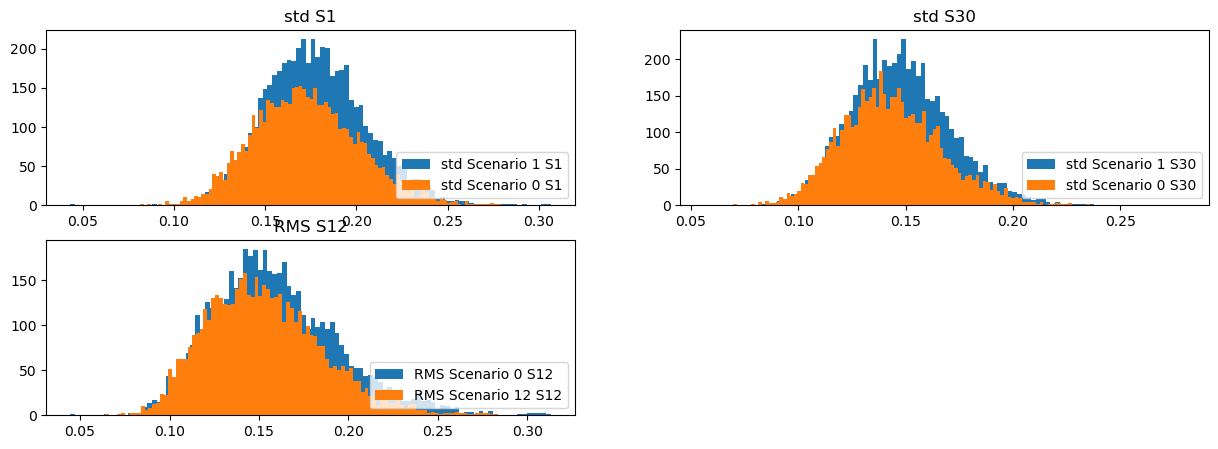

In [7]:
## Plotting caracteristics std

propertyvalue = 'std'

axis = df_1_S1[propertyvalue];
axis30 = df_1_S30[propertyvalue];
axis0 = df_0_S1[propertyvalue];
axis030 = df_0_S30[propertyvalue];

plt.figure(figsize=(15, 5))
plt.subplot(2,2,1)

plt.title("std S1")
plt.hist(axis, bins=100, label="std Scenario 1 S1")
plt.hist(axis0, bins=100, label="std Scenario 0 S1")

# plt.ylim([0,0.35])

plt.legend(["std Scenario 1 S1", "std Scenario 0 S1"], loc ="lower right")

plt.subplot(2,2,2)

plt.title("std S30")
plt.hist(axis30, bins=100, label="std Scenario 1 S30")
plt.hist(axis030, bins=100, label="std Scenario 0 S30")

# plt.ylim([0,0.35])

plt.legend(["std Scenario 1 S30", "std Scenario 0 S30"], loc ="lower right")

axis012 = df_0_S12[propertyvalue];
axis1212 = df_12_S12[propertyvalue];
axis121 = df_12_S1[propertyvalue];

plt.subplot(2,2,3)

plt.title("RMS S12")
plt.hist(axis012, bins=100, label="RMS Scenario 0 S12")
plt.hist(axis1212, bins=100, label="RMS Scenario 12 S12")

# plt.ylim([0,0.35])

plt.legend(["RMS Scenario 0 S12","RMS Scenario 12 S12"], loc ="lower right")

In [8]:
### Grafico igual ao rms
## Maiores picos observador para o cenário de dano 1 no sensor 1 com relação ao sensor 30, 
### o que espera-se tendo em vista que o dano está aplicado ai sensor 1 e o sensor 30 esta longe

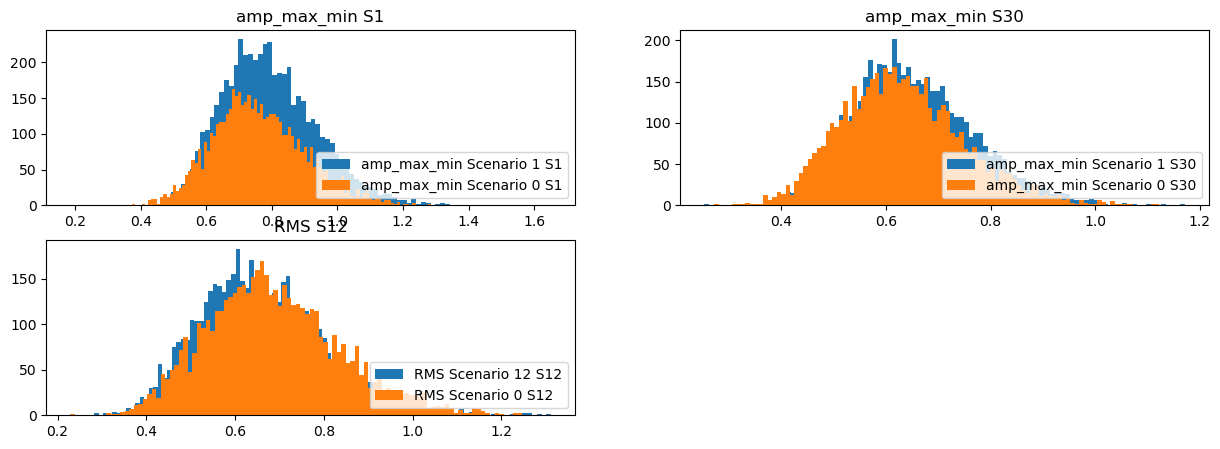

In [9]:
## Plotting caracteristics amp_max_min

propertyvalue = 'amp_max_min'

axis = df_1_S1[propertyvalue];
axis30 = df_1_S30[propertyvalue];
axis0 = df_0_S1[propertyvalue];
axis030 = df_0_S30[propertyvalue];

plt.figure(figsize=(15, 5))
plt.subplot(2,2,1)

plt.title("amp_max_min S1")
plt.hist(axis, bins=100, label="amp_max_min Scenario 1 S1")
plt.hist(axis0, bins=100, label="amp_max_min Scenario 0 S1")

# plt.ylim([0.18,1.7])

plt.legend(["amp_max_min Scenario 1 S1", "amp_max_min Scenario 0 S1"], loc ="lower right")

plt.subplot(2,2,2)

plt.title("amp_max_min S30")
plt.hist(axis30, bins=100, label="amp_max_min Scenario 1 S30")
plt.hist(axis030, bins=100, label="amp_max_min Scenario 0 S30")

# plt.ylim([0.18,1.7])

plt.legend(["amp_max_min Scenario 1 S30", "amp_max_min Scenario 0 S30"], loc ="lower right")

axis012 = df_0_S12[propertyvalue];
axis1212 = df_12_S12[propertyvalue];
axis121 = df_12_S1[propertyvalue];

plt.subplot(2,2,3)

plt.title("RMS S12")
plt.hist(axis1212, bins=100, label="RMS Scenario 12 S12")
plt.hist(axis012, bins=100, label="RMS Scenario 0 S12")

# plt.ylim([0.18,1.7])

plt.legend(["RMS Scenario 12 S12", "RMS Scenario 0 S12"], loc ="lower right")

In [10]:
## Maiores picos observador para o cenário de dano 1 no sensor 1 com relação ao sensor 30, 
### o que espera-se tendo em vista que o dano está aplicado ai sensor 1 e o sensor 30 esta longe
### mas tambem no cenario 0, onde não há dano, tambem observa-se maiores valores para o S1 que o S30

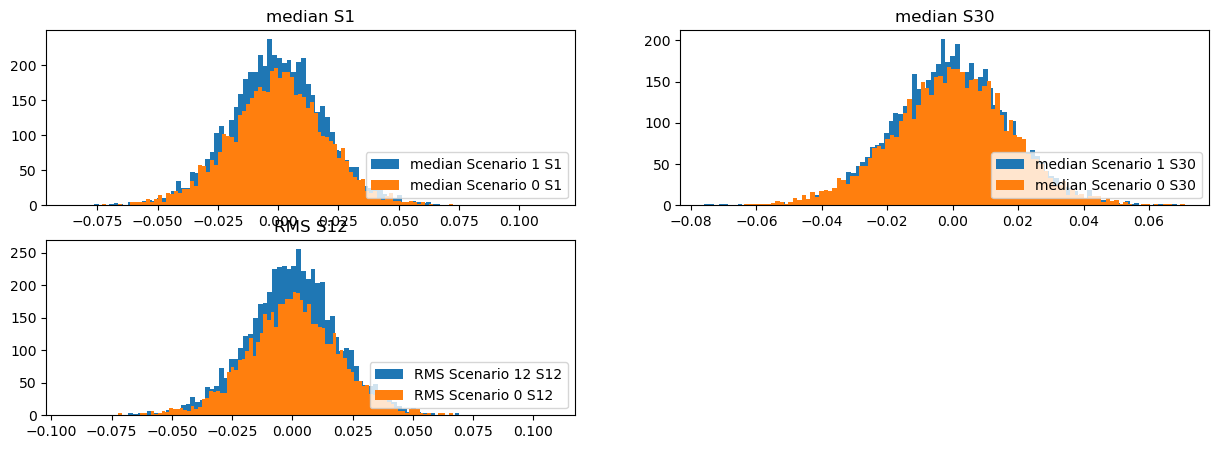

In [11]:
## Plotting caracteristics median

propertyvalue = 'median'

axis = df_1_S1[propertyvalue];
axis30 = df_1_S30[propertyvalue];
axis0 = df_0_S1[propertyvalue];
axis030 = df_0_S30[propertyvalue];

plt.figure(figsize=(15, 5))
plt.subplot(2,2,1)

plt.title("median S1")
plt.hist(axis, bins=100, label="median Scenario 1 S1")
plt.hist(axis0, bins=100, label="median Scenario 0 S1")

# plt.ylim([-0.08,0.125])

plt.legend(["median Scenario 1 S1", "median Scenario 0 S1"], loc ="lower right")

plt.subplot(2,2,2)

plt.title("median S30")
plt.hist(axis30, bins=100, label="median Scenario 1 S30")
plt.hist(axis030, bins=100, label="median Scenario 0 S30")

# plt.ylim([-0.08,0.125])

plt.legend(["median Scenario 1 S30", "median Scenario 0 S30"], loc ="lower right")

axis012 = df_0_S12[propertyvalue];
axis1212 = df_12_S12[propertyvalue];
axis121 = df_12_S1[propertyvalue];

plt.subplot(2,2,3)

plt.title("RMS S12")
plt.hist(axis1212, bins=100, label="RMS Scenario 12 S12")
plt.hist(axis012, bins=100, label="RMS Scenario 0 S12")

# plt.ylim([-0.08,0.125])

plt.legend(["RMS Scenario 12 S12", "RMS Scenario 0 S12"], loc ="lower right")

In [12]:
## A mediana oscila mais para o cenário de dano 1 no sensor 1 com relação ao sensor 30, 
### o que também é esperado tendo em vista que o dano está aplicado ai sensor 1 e o sensor 30 esta longe
### no inicio da coleta de dados do cenario sem dano para o sensor 30, há uma discrepancia da mediana para valores reduzidos, até 'estabilizar'

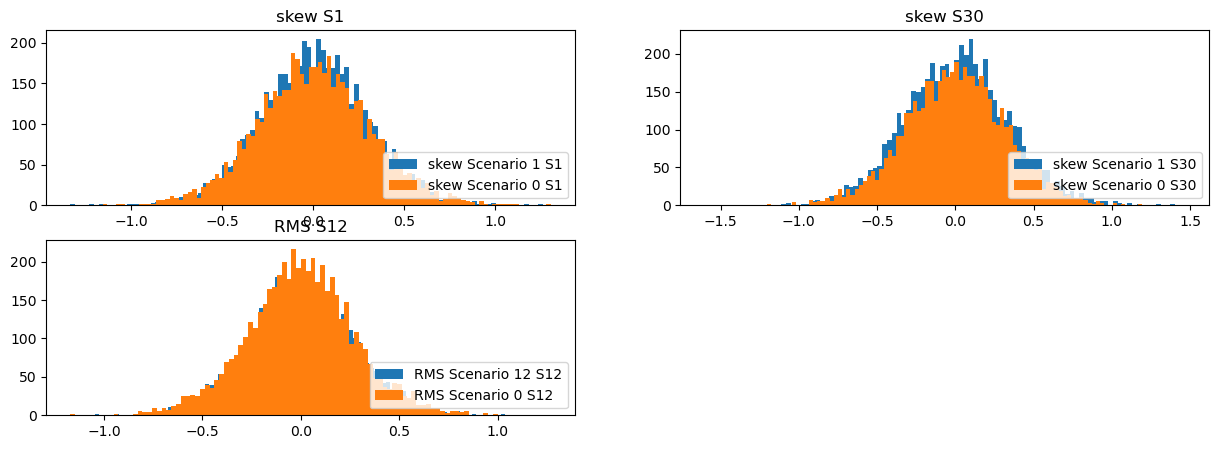

In [13]:
## Plotting caracteristics skew

propertyvalue = 'skew'

axis = df_1_S1[propertyvalue];
axis30 = df_1_S30[propertyvalue];
axis0 = df_0_S1[propertyvalue];
axis030 = df_0_S30[propertyvalue];

low_thread = 0
up_thread = 5242

plt.figure(figsize=(15, 5))
plt.subplot(2,2,1)

plt.title("skew S1")
plt.hist(axis[low_thread:up_thread], bins=100, label="skew Scenario 1 S1")
plt.hist(axis0[low_thread:up_thread], bins=100, label="skew Scenario 0 S1")

#plt.ylim([-1.6,1.5])

plt.legend(["skew Scenario 1 S1", "skew Scenario 0 S1"], loc ="lower right")

plt.subplot(2,2,2)

plt.title("skew S30")
plt.hist(axis30[low_thread:up_thread], bins=100, label="skew Scenario 1 S30")
plt.hist(axis030[low_thread:up_thread], bins=100, label="skew Scenario 0 S30")

#plt.ylim([-1.6,1.5])

plt.legend(["skew Scenario 1 S30", "skew Scenario 0 S30"], loc ="lower right")

axis012 = df_0_S12[propertyvalue];
axis1212 = df_12_S12[propertyvalue];
axis121 = df_12_S1[propertyvalue];

plt.subplot(2,2,3)

plt.title("RMS S12")
plt.hist(axis1212, bins=100, label="RMS Scenario 12 S12")
plt.hist(axis012, bins=100, label="RMS Scenario 0 S12")

#plt.ylim([-1.6,1.5])

plt.legend(["RMS Scenario 12 S12", "RMS Scenario 0 S12"], loc ="lower right")

In [14]:
## A skew mede o grau de assimetria dos dados ao redor da media 
## O dano aparenta estar diminuindo a assimetria dos dados, o que não é esperado porém não pode dizer que não foi observado, 
## o inicio há maiores amplitudes para o sensor 30
## pois a relação entre cenários com relação aos sensores mostra que quando houve dano há menos picos

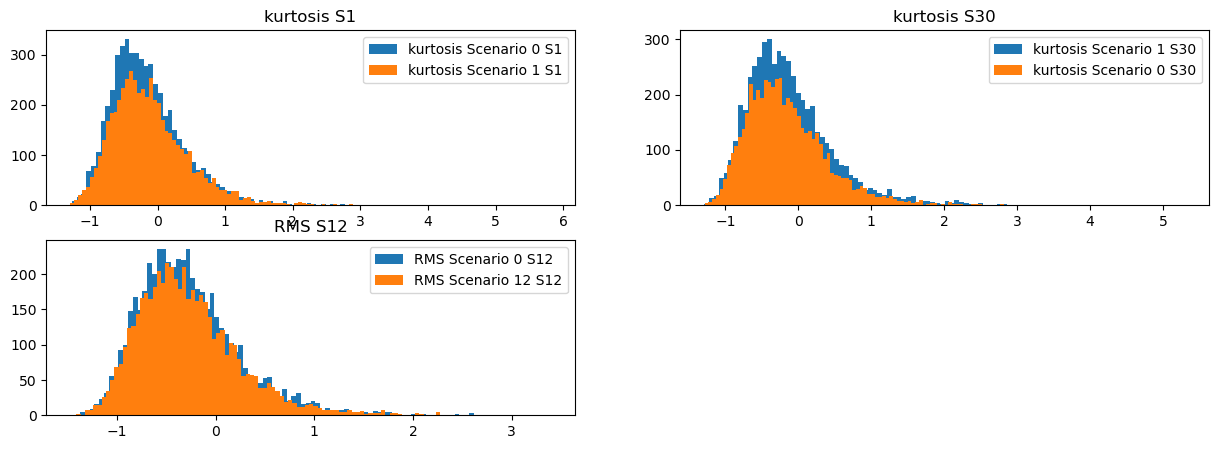

In [15]:
## Plotting caracteristics kurtosis

propertyvalue = 'kurtosis'

axis = df_1_S1[propertyvalue];
axis30 = df_1_S30[propertyvalue];
axis0 = df_0_S1[propertyvalue];
axis030 = df_0_S30[propertyvalue];

plt.figure(figsize=(15, 5))
plt.subplot(2,2,1)

plt.title("kurtosis S1")
plt.hist(axis0, bins=100, label="kurtosis Scenario 0 S1")
plt.hist(axis, bins=100, label="kurtosis Scenario 1 S1")

#plt.ylim([-1.5,6])

plt.legend(["kurtosis Scenario 0 S1" , "kurtosis Scenario 1 S1"], loc ="upper right")

plt.subplot(2,2,2)

plt.title("kurtosis S30")
plt.hist(axis30, bins=100, label="kurtosis Scenario 1 S30")
plt.hist(axis030, bins=100, label="kurtosis Scenario 0 S30")

#plt.ylim([-1.5,6])

plt.legend(["kurtosis Scenario 1 S30", "kurtosis Scenario 0 S30"], loc ="upper right")

axis012 = df_0_S12[propertyvalue];
axis1212 = df_12_S12[propertyvalue];
axis121 = df_12_S1[propertyvalue];

plt.subplot(2,2,3)

plt.title("RMS S12")
plt.hist(axis012, bins=100, label="RMS Scenario 0 S12")
plt.hist(axis1212, bins=100, label="RMS Scenario 12 S12")

#plt.ylim([-1.5,6])

plt.legend(["RMS Scenario 0 S12", "RMS Scenario 12 S12"], loc ="upper right")

In [16]:
## A kurtosi mede o grau de o grau de picos e achatamentos em relação a distribuição deles, 
## menor kurtosi maior o achatamento e há maior distribuição dos dados, reduz a concentração dos dados. Pode indicar vibração em amplitudes menores (frequencias naturais)
## O dano aparenta estar se fazendo presente nos dados em ambos os sensores porém para o sensor mais distante da localização do dano esta ocorrendo uma concentração desses dados, uma kurtosi maior 

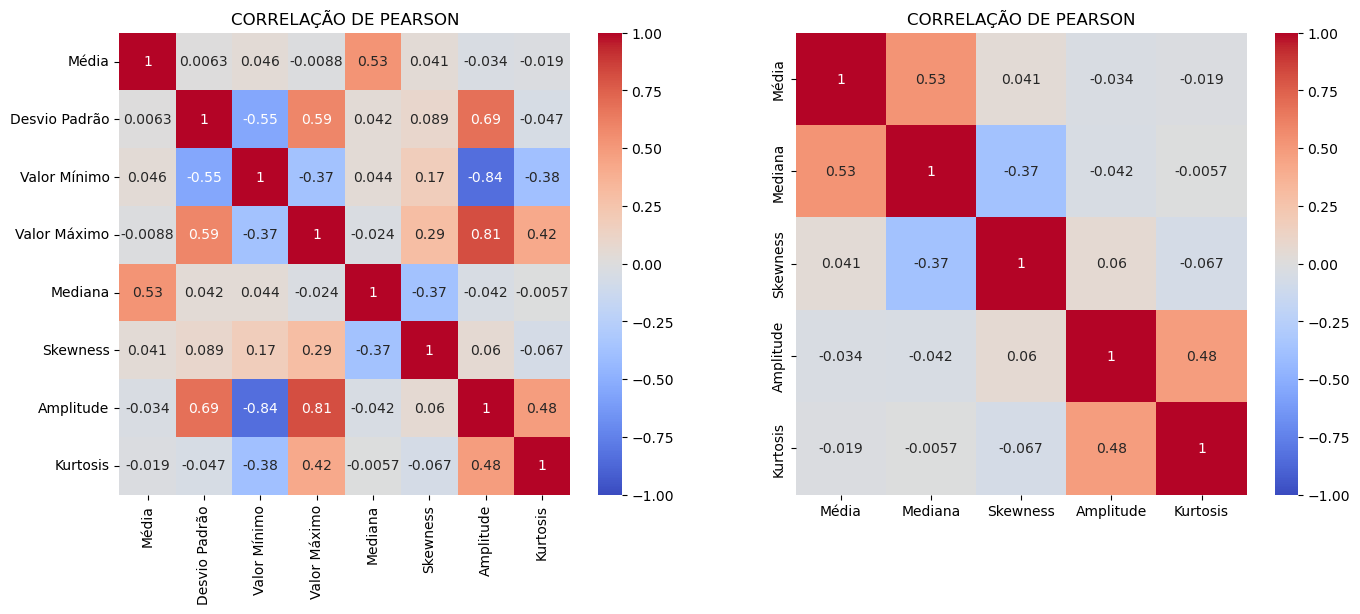

In [19]:
# ENCONTRANDO COVARIÂNCIAS LINEARES
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.title("CORRELAÇÃO DE PEARSON")
sns.heatmap(df_1_S1.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1);

plt.subplot(1,2,2)
plt.title("CORRELAÇÃO DE PEARSON")
sns.heatmap(df_1_S1.drop(columns=['Desvio Padrão','Valor Mínimo','Valor Máximo']).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1);

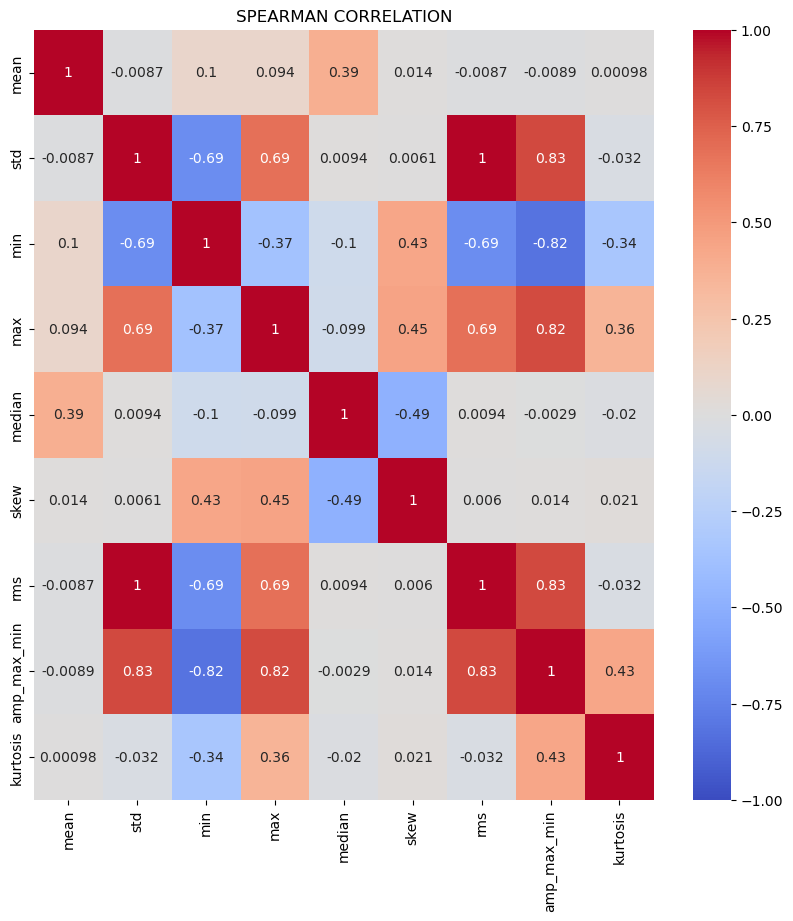

In [18]:
# ENCONTRANDO COVARIÂNCIAS QUADRÁTICAS
plt.figure(figsize=(10,10))
plt.title("SPEARMAN CORRELATION")
sns.heatmap(df_1_S1.corr(method= 'spearman'), annot=True, cmap='coolwarm', vmin=-1, vmax=1);

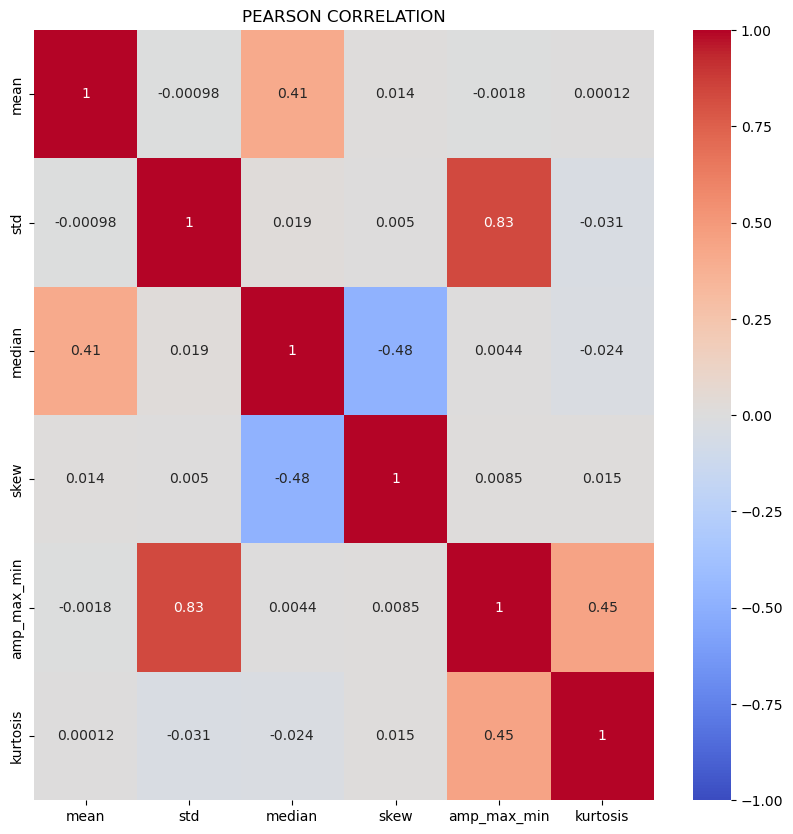

In [19]:
# ENCONTRANDO COVARIÂNCIAS LINEARES
plt.figure(figsize=(10,10))
plt.title("PEARSON CORRELATION")
sns.heatmap(df_1_S1.drop(columns=['rms','min','max']).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1);

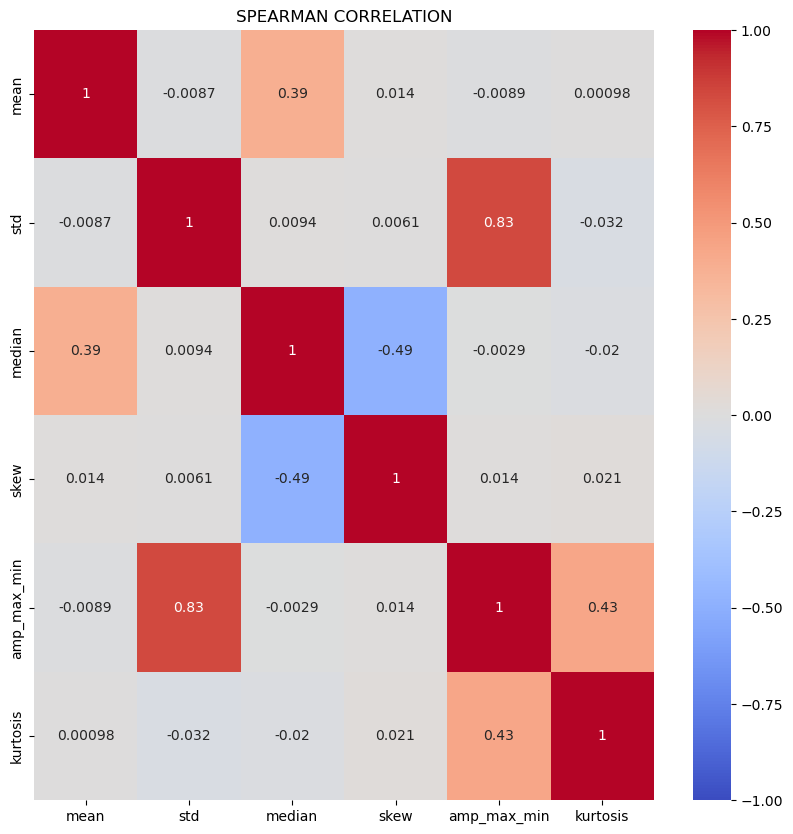

In [20]:
# ENCONTRANDO COVARIÂNCIAS QUADRÁTICAS
plt.figure(figsize=(10,10))
plt.title("SPEARMAN CORRELATION")
sns.heatmap(df_1_S1.drop(columns=['rms','min','max']).corr(method= 'spearman'), annot=True, cmap='coolwarm', vmin=-1, vmax=1);

In [21]:
# Signal in the frequencie domain

C:\Users\User\AppData\Local\Temp\ipykernel_3968\907705050.py:15: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, np.abs(X), 'b', \


(0.0, 512.0)

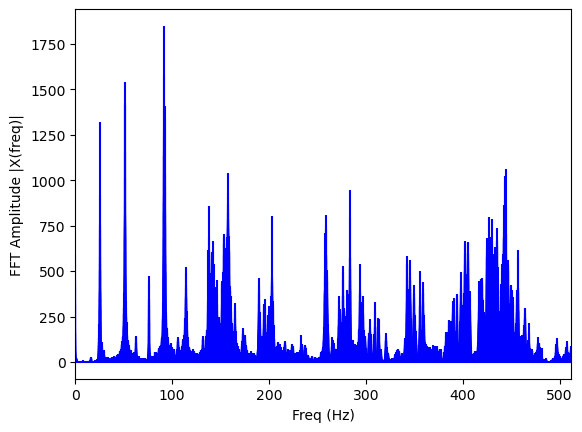

In [22]:
sampling_rate = 1024
x_axis=df_single_0['Time']
y_axis=df_single_0['S30']

#plt.plot(x_axis[100000:100050],y_axis[100000:100050], label="Scenario 0 S30")
#plt.legend(["Scenario 0 S30"], loc ="lower right")


X = fft(y_axis)
N = len(X)
n = np.arange(N)
T = N/sampling_rate
freq = n/T

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 512)

In [23]:
values = np.random.rand(200)
# numero de agroupamento
n_group = 50

# Initialize an empty list to store the means of each group
grouped_means = []

# Loop through the array in groups of size 'group_size'
for i in range(0, len(freq), n_group):
    # Get the group of values
    group = freq[i:i+n_group]
    
    # Calculate the mean of the group
    #mean = np.mean(group)

    # Generate a sample frequency spectrum
    #freq = np.linspace(0, 1000, num=1000)
    #group_test = freq[0:51]

    #dataframe with cara
    #freq_carac = pd.DataFrame(freq[0:51]);

    # Calculate characteristics
    #freq_carac['dominant_freq'] = group[np.argmax(group)]
    #freq_carac['bandwidth'] = np.sum(group > np.max(group)/2) * (group[1] - group[0])
    #freq_carac['harmonics'] = np.argmax(group[1:]) + 1
    #freq_carac['snr'] = np.sum(group[1:]) / np.sum(group[50:])
    
    charac = group[np.argmax(group)]
    
    # Add the mean to the list of means
    grouped_means.append(charac)

# Print the result
grouped_means

#grouped_fft = freq.groupby(np.arange(len(original_df)) // 50).agg(['mean', 'std', 'min', 'max', 'median', 'skew'])

[0.19140625,
 0.38671875,
 0.58203125,
 0.77734375,
 0.97265625,
 1.16796875,
 1.36328125,
 1.55859375,
 1.75390625,
 1.94921875,
 2.14453125,
 2.33984375,
 2.53515625,
 2.73046875,
 2.92578125,
 3.12109375,
 3.31640625,
 3.51171875,
 3.70703125,
 3.90234375,
 4.09765625,
 4.29296875,
 4.48828125,
 4.68359375,
 4.87890625,
 5.07421875,
 5.26953125,
 5.46484375,
 5.66015625,
 5.85546875,
 6.05078125,
 6.24609375,
 6.44140625,
 6.63671875,
 6.83203125,
 7.02734375,
 7.22265625,
 7.41796875,
 7.61328125,
 7.80859375,
 8.00390625,
 8.19921875,
 8.39453125,
 8.58984375,
 8.78515625,
 8.98046875,
 9.17578125,
 9.37109375,
 9.56640625,
 9.76171875,
 9.95703125,
 10.15234375,
 10.34765625,
 10.54296875,
 10.73828125,
 10.93359375,
 11.12890625,
 11.32421875,
 11.51953125,
 11.71484375,
 11.91015625,
 12.10546875,
 12.30078125,
 12.49609375,
 12.69140625,
 12.88671875,
 13.08203125,
 13.27734375,
 13.47265625,
 13.66796875,
 13.86328125,
 14.05859375,
 14.25390625,
 14.44921875,
 14.64453125,
 

In [24]:
# Frequency content: 
## The frequency spectrum reveals the frequency content of the signal, showing which frequencies are present and their relative strengths.

# Dominant frequency: 
## The dominant frequency is the frequency with the highest amplitude in the frequency spectrum. It represents the frequency component that is most prominent in the signal.

# Bandwidth: 
## The bandwidth of the signal is the range of frequencies over which the signal has significant power. It can be measured by calculating the full width at half maximum (FWHM) of the frequency spectrum.

# Harmonic content: 
## The frequency spectrum can also reveal any harmonic content in the signal, which is characterized by peaks at integer multiples of the fundamental frequency.

# Signal-to-noise ratio (SNR): 
## The SNR of the signal can be estimated from the ratio of the power in the signal frequency band to the power in the noise frequency band.

# Phase information: 
## In addition to amplitude information, the Fourier transform also provides phase information about the signal. The phase represents the relative timing of the different frequency components of the signal.

In [25]:
# Generate a sample frequency spectrum
#freq = np.linspace(0, 1000, num=1000)
group_test = freq[0:51]

#dataframe with cara
freq_carac = pd.DataFrame(freq[0:51]);

# Calculate characteristics
freq_carac['dominant_freq'] = group_test[np.argmax(group_test)]
freq_carac['bandwidth'] = np.sum(group_test > np.max(group_test)/2) * (group_test[1] - group_test[0])
freq_carac['harmonics'] = np.argmax(group_test[1:]) + 1
freq_carac['snr'] = np.sum(group_test[1:]) / np.sum(group_test[50:])

freq_carac['dominant_freq'][1]
freq_carac

,0,dominant_freq,bandwidth,harmonics,snr
0,0.000000,0.195312,0.097656,50,25.5
1,0.003906,0.195312,0.097656,50,25.5
2,0.007812,0.195312,0.097656,50,25.5
3,0.011719,0.195312,0.097656,50,25.5
4,0.015625,0.195312,0.097656,50,25.5
5,0.019531,0.195312,0.097656,50,25.5
6,0.023438,0.195312,0.097656,50,25.5
7,0.027344,0.195312,0.097656,50,25.5
8,0.031250,0.195312,0.097656,50,25.5
9,0.035156,0.195312,0.097656,50,25.5


In [26]:
# Generate a sample frequency spectrum
#freq = np.linspace(0, 1000, num=1000)
group_test = freq[200:251]

# Calculate characteristics
dominant_freq = group_test[np.argmax(group_test)]
bandwidth = np.sum(group_test > np.max(group_test)/2) * (group_test[1] - group_test[0])
harmonics = np.argmax(group_test[1:]) + 1
snr = np.sum(group_test[1:]) / np.sum(group_test[50:])
phase = np.angle(np.fft.fft(np.sin(2*np.pi*group_test*10/1000)))

# Print results
print(f"Dominant frequency: {dominant_freq:.2f} Hz")
print(f"Bandwidth: {bandwidth:.2f} Hz")
print(f"Fundamental frequency: {dominant_freq/harmonics:.2f} Hz")
print(f"Signal-to-noise ratio: {snr:.2f}")
print(f"Phase: {phase}")

Dominant frequency: 0.98 Hz
Bandwidth: 0.20 Hz
Fundamental frequency: 0.02 Hz
Signal-to-noise ratio: 45.10
Phase: [ 0.          1.63250617  1.69405082  1.75563218  1.81722272  1.87881693
  1.94041297  2.00201006  2.06360781  2.12520599  2.18680447  2.24840317
  2.31000204  2.37160103  2.43320012  2.49479929  2.55639852  2.61799779
  2.67959711  2.74119646  2.80279584  2.86439523  2.92599464  2.98759407
  3.0491935   3.11079293 -3.11079293 -3.0491935  -2.98759407 -2.92599464
 -2.86439523 -2.80279584 -2.74119646 -2.67959711 -2.61799779 -2.55639852
 -2.49479929 -2.43320012 -2.37160103 -2.31000204 -2.24840317 -2.18680447
 -2.12520599 -2.06360781 -2.00201006 -1.94041297 -1.87881693 -1.81722272
 -1.75563218 -1.69405082 -1.63250617]


(0.0, 512.0)

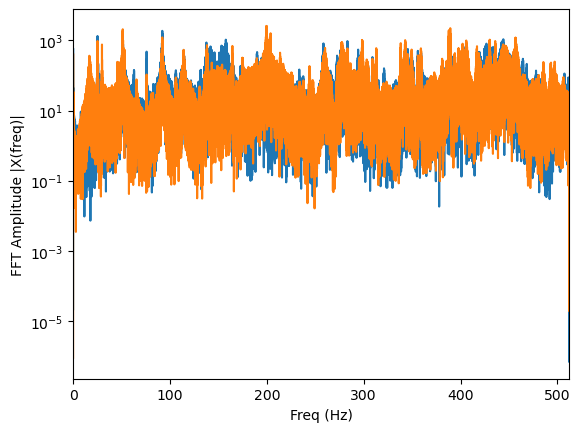

In [27]:
X = fft(y_axis)
N = len(X)
n = np.arange(N)
T = N/sampling_rate
freq = n/T

# plt.stem(freq, np.abs(X), 'b', \
#         markerfmt=" ", basefmt="-b")
plt.semilogy(freq,np.abs(X))
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 512)

X = fft(df_single_0['S1'])
N = len(X)
n = np.arange(N)
T = N/sampling_rate
freq = n/T

# plt.stem(freq, np.abs(X), 'b', \
#         markerfmt=" ", basefmt="-b")
plt.semilogy(freq,np.abs(X))
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 512)

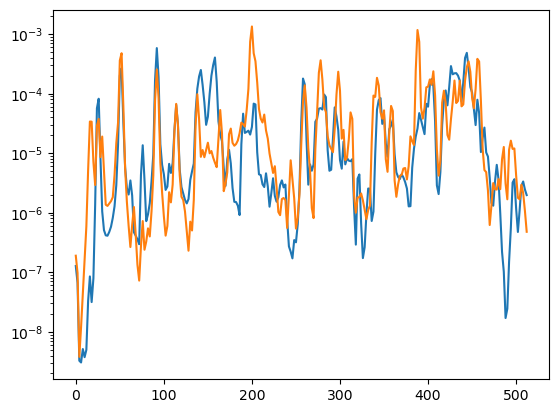

In [28]:
freq, psdy = scipy.signal.csd(y_axis, y_axis, fs=1024, window='hann', nperseg=512, noverlap=None, nfft=512, detrend='constant', return_onesided=True, scaling='density', axis=-1, average='mean')

plt.semilogy(freq, psdy)
freq, psdy = scipy.signal.csd(df_single_0['S1'], df_single_0['S1'], fs=1024, window='hann', nperseg=512, noverlap=None, nfft=512, detrend='constant', return_onesided=True, scaling='density', axis=-1, average='mean')

plt.semilogy(freq, psdy)

In [29]:
#Testadd = scipy.fft(x_axis)
#print(Testadd)